<h1>Fashion-MNIST Challenge</h1>

In [1]:
##################################################
# Imports
##################################################

import math
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
plt.style.use("seaborn")

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
#####################################################
# utilities and evalutation metrics
#####################################################

from operator import itemgetter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report

In [4]:
file_path = '.\\dataset'

##################################################
# Load dataset
##################################################

X_train_original = np.load(os.path.join(file_path,"train.npy"))
X_valid_original = np.load(os.path.join(file_path,"validation.npy"))
X_test_original = np.load(os.path.join(file_path,"test.npy"))
y_train = pd.read_csv(os.path.join(file_path, 'train.csv'))['class'].values
y_valid = pd.read_csv(os.path.join(file_path, 'validation.csv'))['class'].values
y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
###################################################
# Data Shape
###################################################

print("Training set features shape:",X_train_original.shape)
print("Training set labels shape",y_train.shape)
print("Validation set features shape",X_valid_original.shape)
print("Validation set labels shape",y_valid.shape)
print("Test set features shape",X_test_original.shape)
print(f"There are in total {len(y_labels)} possible classes:\n"+str(y_labels))

Training set features shape: (50000, 784)
Training set labels shape (50000,)
Validation set features shape (10000, 784)
Validation set labels shape (10000,)
Test set features shape (10000, 784)
There are in total 10 possible classes:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


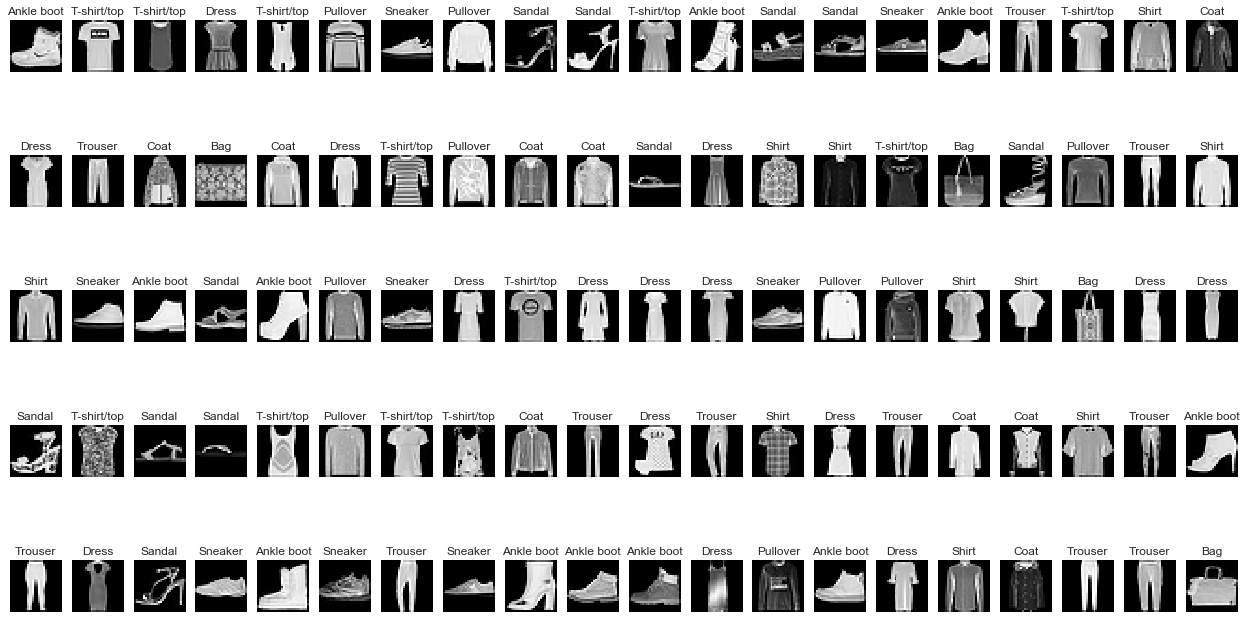

In [6]:
########################################################
# Data sample visualization
########################################################

plt.figure(figsize=(22, 12))
for idx in range(100):
    plt.subplot(5, 20, idx + 1)
    img = X_train_original[idx].reshape(28, 28)
    plt.title(f'{y_labels[y_train[idx]]}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
#########################################
# Data preprocessing
#########################################

# any pixel is represented by a number between 0-255

print("pixels range:",(X_train_original.min(), X_train_original.max()))

# feature scaling can be easily achieved by min-max normalization:

X_train = X_train_original.copy()/255.0
X_valid = X_valid_original.copy()/255.0
X_test = X_test_original.copy()/255.0

pixels range: (0, 255)


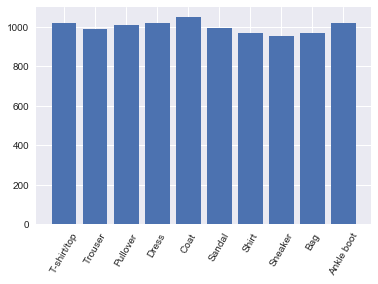

In [8]:
############################
# Targets distribution
############################

# to understand how data is distributed and consequently which metrics to use to evaluate the models

targets_count = pd.Series(y_valid).value_counts().sort_index()
plt.bar(targets_count.index,targets_count.values)
plt.xticks(targets_count.index,labels=y_labels,rotation=60)
plt.show()

# data is pretty much balanced, accuracy can be used for evaluation

In [187]:
###################################
# Models shortlisting
###################################

# some quick tests are performed to figure out which models could reach the best results
# we'll use a subset of X_train to figure out which models to shortlist, as training some of them is quite time consuming

X_train_subset = X_train[:10000]
y_train_subset = y_train[:10000]

# just to be sure the subset is diversified across all classes, we can also plot the distribution of labels

# plt.hist(y_train_subset,alpha=0.75)
# plt.show()

In [9]:
# just testing some models without worrying too much (for now) about hyperparameters 
# this is done in order to quickly select the most promising ones.

In [11]:
####################################################
# Models to be tested
####################################################

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [12]:
# Let's start with SGD

t0 = time.perf_counter()
sgd_clf = SGDClassifier(random_state=1)
sgd_clf.fit(X_train_subset,y_train_subset)
t1 = time.perf_counter()
sgd_fit_time = round(t1-t0,2)
t0 = time.perf_counter()
sgd_score = sgd_clf.score(X_valid,y_valid)
t1 = time.perf_counter()
sgd_score_time = round(t1-t0,2)

In [13]:
print(f"SGD classifier score: {sgd_score}")
print(f"Time to train: {sgd_fit_time}s")
print(f"Time to evaluate: {sgd_score_time}s")

SGD classifier score: 0.8094
Time to train: 16.56s
Time to evaluate: 0.03s


In [38]:
# Logistic regression

t0 = time.perf_counter()
log_clf = LogisticRegression(random_state=0, max_iter=1000)
log_clf.fit(X_train_subset,y_train_subset)
t1 = time.perf_counter()
log_fit_time = round(t1-t0,2)
t0 = time.perf_counter()
log_score = log_clf.score(X_valid,y_valid)
t1 = time.perf_counter()
log_score_time = round(t1-t0,2)

In [39]:
print(f"Logistic Regression score: {log_score}")
print(f"Time to train: {log_fit_time}s")
print(f"Time to evaluate: {log_score_time}s")

Logistic Regression score: 0.8302
Time to train: 28.23s
Time to evaluate: 0.03s


In [16]:
# Let's try knn

t0 = time.perf_counter()
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_subset,y_train_subset)
t1 = time.perf_counter()
knn_fit_time = round(t1-t0,2)
t0 = time.perf_counter()
knn_score = knn_clf.score(X_valid,y_valid)
t1 = time.perf_counter()
knn_score_time = round(t1-t0,2)

In [17]:
print(f"KNN score:{knn_score}")
print(f"Time to train: {knn_fit_time}s")
print(f"Time to evaluate: {knn_score_time}s")

KNN score:0.8221
Time to train: 5.44s
Time to evaluate: 189.28s


In [18]:
# Decision Tree

t0 = time.perf_counter()
tree_clf = DecisionTreeClassifier() 
tree_clf.fit(X_train_subset,y_train_subset)
t1 = time.perf_counter()
tree_fit_time = round(t1-t0,2)
t0 = time.perf_counter()
tree_score = tree_clf.score(X_valid,y_valid)
t1 = time.perf_counter()
tree_score_time = round(t1-t0,2)

In [19]:
print(f"Decision tree score:{tree_score}")
print(f"Time to train: {tree_fit_time}s")
print(f"Time to evaluate: {tree_score_time}s")

Decision tree score:0.7482
Time to train: 5.42s
Time to evaluate: 0.03s


In [20]:
t0 = time.perf_counter()
svm_clf = SVC(kernel="linear") 
svm_clf.fit(X_train_subset,y_train_subset)
t1 = time.perf_counter()
svm_fit_time = round(t1-t0,2)
t0 = time.perf_counter()
svm_score = svm_clf.score(X_valid,y_valid)
t1 = time.perf_counter()
svm_score_time = round(t1-t0,2)

In [21]:
print(f"SVM classifier score:{svm_score}")
print(f"Time to train: {svm_fit_time}s")
print(f"Time to evaluate: {svm_score_time}s")

SVM classifier score:0.83
Time to train: 25.16s
Time to evaluate: 43.62s


In [22]:
# finally we're going to try a really simple NN with just one hidden layer

model = keras.models.Sequential([keras.layers.Dense(100,activation="relu",input_shape=X_train_subset.shape[1:]),
                                 keras.layers.Dense(10,activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])

In [23]:
t0 = time.perf_counter()
history = model.fit(X_train_subset,y_train_subset,epochs=50,validation_data=(X_valid,y_valid),
                    verbose=0)
t1 = time.perf_counter()
nn_fit_time = round(t1-t0,2)

In [24]:
t0 = time.perf_counter()
y_pred = np.argmax(model.predict(X_valid),axis=1)
nn_val_acc = accuracy_score(y_pred,y_valid)
t1 = time.perf_counter()
nn_score_time = round(t1-t0,2)

In [26]:
print(f"Validation accuracy: {nn_val_acc}")
print(f"Time to train: {nn_fit_time}s")
print(f"Time to evaluate: {nn_score_time}s")

Validation accuracy: 0.8519
Time to train: 26.51s
Time to evaluate: 0.29s


In [27]:
## Logistic regression, SVM and the neural net seem to be the most promising. In particular the latter.

In [30]:
## let's try to tweak some parameters of the logistic regression model to see if we're able to reach
##   a performance as good as the one obtained for the neural network, or possibly better.

## We're using a cross validation grid search in order to quickly do so.

In [41]:
param_grid = [{"C":[0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000]}]

grid_search = GridSearchCV(LogisticRegression(max_iter=1000),param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10,
                                30, 100, 300, 1000]}])

In [48]:
cvres = grid_search.cv_results_
results = list(zip(cvres["params"],cvres["mean_test_score"]))
results.sort(key=itemgetter(1),reverse=True)
res = []
for params,mean_score in results:
    print(params,"\t",round(mean_score,5))
    res.append((params["C"],mean_score))

{'C': 0.1} 	 0.85614
{'C': 0.03} 	 0.85524
{'C': 0.3} 	 0.85406
{'C': 1} 	 0.85006
{'C': 0.01} 	 0.84966
{'C': 3} 	 0.84622
{'C': 10} 	 0.84278
{'C': 30} 	 0.84032
{'C': 100} 	 0.83962
{'C': 300} 	 0.83928
{'C': 1000} 	 0.83878
{'C': 0.003} 	 0.83636
{'C': 0.001} 	 0.81564


In [51]:
Cs = []
scores = []
for C,score in sorted(res,key=itemgetter(0)):
    Cs.append(C)
    scores.append(score)
log3_Cs = []
for C in Cs:
    log3_Cs.append(math.log(C,3))

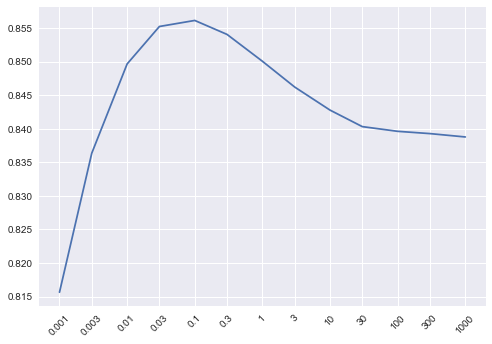

In [300]:
fig, ax = plt.subplots()
plt.plot(log3_Cs,scores)
plt.xticks(ticks=log3_Cs,labels=Cs,rotation=45)
plt.show()

In [45]:
## The results for C = 0.1 is quite good, a litte bit better than the one obtained for the neural network even.

In [28]:
## SVM usually is quite computationally expensive and time consuming for large datasets with many features
## In particular in multiclass classification problems, such as this one, the scikit implementation
##    automatically split the problem in many binary classification problems, training n*(n-1)/2 binary classifiers (OvO);
##    so in this case 45 binary classifiers are trained, taking a lot of time.

## It might be worthwhile if this allows us to reach better performances than the neural net;
##   in that case we'll later tweak the hyperparams to get the best model possible.

In [26]:
t0 = time.perf_counter()
svm_clf = SVC(kernel="linear") 
svm_clf.fit(X_train,y_train)
t1 = time.perf_counter()
svm_fit_time = round(t1-t0,2)
t0 = time.perf_counter()
svm_score = svm_clf.score(X_valid,y_valid)
t1 = time.perf_counter()
svm_score_time = round(t1-t0,2)
print(f"SVM classifier score:{svm_score}")
print(f"Time to train: {svm_fit_time}s")
print(f"Time to evaluate: {svm_score_time}s")

SVM classifier score:0.8515
Time to train: 958.94s
Time to evaluate: 340.48s


In [29]:
## Even though we could probably further improve the accuracy of a model based on SVM tuning the hyperparameters
##   it seems like the results obtainable are close to those of the neural network, which takes a lot less time to train.

In [73]:
## Since it looks like NNs are the most promising models for this problem, in the next section we're going to
##    tune hyperparameters in order to obtain the best possible model.

In [42]:
### Number of neurons and layers

## We're going to test 3 different architectures:
## - a neural network with only 16 neurons in a single hidden layer;
## - a neural network with 512 neurons in two hidden layers;
## - a neural network with 2048 neurons in two hidden layers.

In [35]:
small_net = keras.models.Sequential([keras.layers.Dense(16,activation="relu",input_shape=X_train.shape[1:]),
                                     keras.layers.Dense(10,activation="softmax")])
small_net.compile(loss="sparse_categorical_crossentropy",
                  optimizer=keras.optimizers.SGD(),
                  metrics=["accuracy"])
small_net_history = small_net.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),verbose=0)

In [41]:
med_net = keras.models.Sequential([keras.layers.Dense(512,activation="relu",input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(512,activation="relu"),
                                 keras.layers.Dense(10,activation="softmax")])
med_net.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])
med_net_history = med_net.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),verbose=0)

In [37]:
big_net = keras.models.Sequential([keras.layers.Dense(2048,activation="relu",input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(2048,activation="relu"),
                                 keras.layers.Dense(10,activation="softmax")])
big_net.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(),
              metrics=["accuracy"])
big_net_history = big_net.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),verbose=0)

In [38]:
epochs = list(range(25))

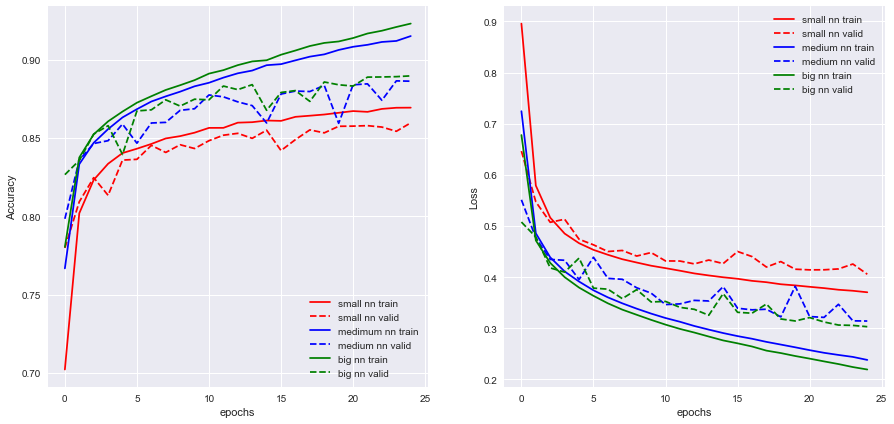

In [43]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(epochs,small_net_history.history["accuracy"],color="red",label="small nn train")
plt.plot(epochs,small_net_history.history["val_accuracy"],color="red",label="small nn valid",linestyle="dashed")
plt.plot(epochs,med_net_history.history["accuracy"],color="blue",label="medimum nn train")
plt.plot(epochs,med_net_history.history["val_accuracy"],color="blue",label="medium nn valid",linestyle="dashed")
plt.plot(epochs,big_net_history.history["accuracy"],color="green",label="big nn train")
plt.plot(epochs,big_net_history.history["val_accuracy"],color="green",label="big nn valid",linestyle="dashed")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.subplot(1,2,2)
plt.plot(epochs,small_net_history.history["loss"],color="red",label="small nn train")
plt.plot(epochs,small_net_history.history["val_loss"],color="red",label="small nn valid",linestyle="dashed")
plt.plot(epochs,med_net_history.history["loss"],color="blue",label="medium nn train")
plt.plot(epochs,med_net_history.history["val_loss"],color="blue",label="medium nn valid",linestyle="dashed")
plt.plot(epochs,big_net_history.history["loss"],color="green",label="big nn train")
plt.plot(epochs,big_net_history.history["val_loss"],color="green",label="big nn valid",linestyle="dashed")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

In [150]:
# it's clear that the small net performs worse than the medium and big neural nets
# Both the medium and big NN reach about the same validation accuracy and validation loss
# BUT it takes a lot of time to train the big NN (it took almost 1 h)  and it seems to be slightly more prone to overfitting

In [44]:
med_net.evaluate(X_valid,y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8863


[0.3142189383506775, 0.8863000273704529]

In [45]:
big_net.evaluate(X_valid,y_valid)

313/313 [==============================] - 3s 9ms/step - loss: 0.3031 - accuracy: 0.8897


[0.3031381070613861, 0.8896999955177307]

In [ ]:
# Considering what we've said before and the evaluation:
# we're going to choose the medium net for further hyperperams tweaking

In [152]:
# Accuracy is already better than what previously seen for logistic regression and SVM

In [158]:
# Learning rate

## the default so far for the keras.optimizers.SGD is a lr of 0.01

In [140]:
learning_rates = [1e-4,1e-3,1e-2,0.03,0.1,1]
histories = []

for lr in learning_rates:
    model = keras.models.Sequential([keras.layers.Dense(512,activation="relu",input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(512,activation="relu"),
                                 keras.layers.Dense(10,activation="softmax")])
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=lr),
              metrics=["accuracy"])
    history = model.fit(X_train,y_train,epochs=15,validation_data=(X_valid,y_valid),verbose=0)
    histories.append(history)

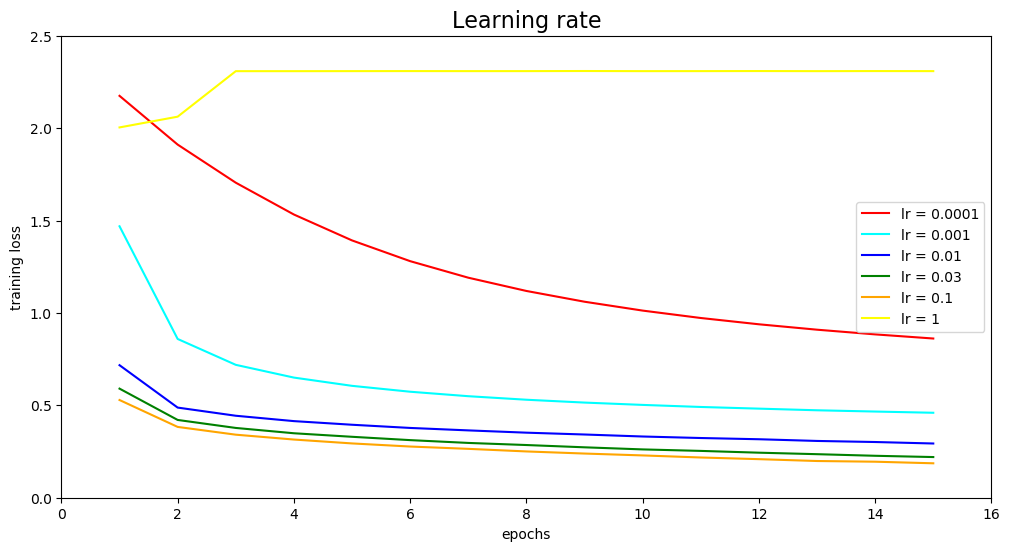

In [151]:
epochs = list(range(1,16))
plt.figure(figsize=(12,6))
plt.title("Learning rate",fontsize=16)
plt.plot(epochs,histories[0].history["loss"],color="red",label="lr = 0.0001")
plt.plot(epochs,histories[1].history["loss"],color="cyan",label="lr = 0.001")
plt.plot(epochs,histories[2].history["loss"],color="blue",label="lr = 0.01")
plt.plot(epochs,histories[3].history["loss"],color="green",label="lr = 0.03")
plt.plot(epochs,histories[4].history["loss"],color="orange",label="lr = 0.1")
plt.plot(epochs,histories[5].history["loss"],color="yellow",label="lr = 1")
plt.xlabel("epochs")
plt.ylabel("training loss")
plt.axis([0,16,0,2.5])
plt.legend()
plt.show()

In [233]:
# it seems like any value between 0.01 and 0.1 is good to perform gradient descent; we'll select 0.03

In [237]:
#So far this is the model

In [47]:
unreg_model = keras.models.Sequential([keras.layers.Dense(512,activation="relu",input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(512,activation="relu"),
                                 keras.layers.Dense(10,activation="softmax")])
unreg_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.03),
              metrics=["accuracy"])
unreg_history = unreg_model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),verbose=0)

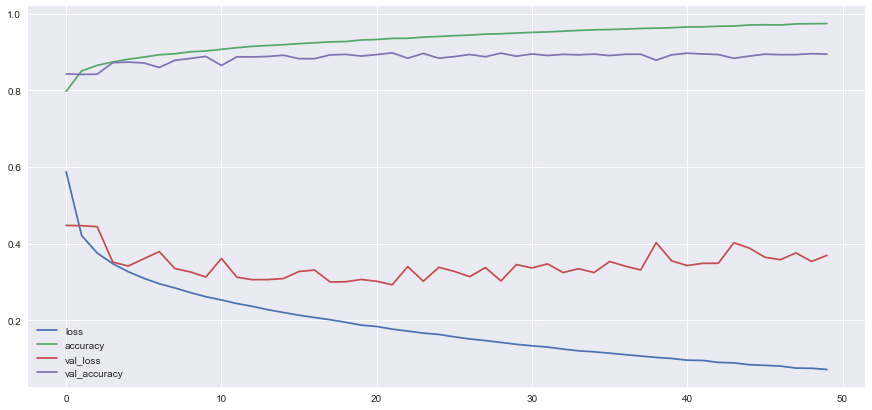

In [48]:
pd.DataFrame(unreg_history.history).plot(figsize=(15,7))

In [48]:
# as it is now the model is clearly overfitting if we train it too much
# regularization and/or dropout are needed to fix high variance.
# we also might want to restrict the number of epochs we train our model for if necessary

In [8]:
## regularization
from tensorflow.keras.regularizers import l2

In [223]:
factors = [0,2e-5,2e-4,2e-3,2e-2]
reg_histories = []

for factor in factors:
    model = keras.models.Sequential([keras.layers.Dense(512,kernel_regularizer=l2(factor),activation="relu",input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(512,kernel_regularizer=l2(factor),activation="relu"),
                                 keras.layers.Dense(10,activation="softmax")])
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.03),
              metrics=["accuracy"])
    history = model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),verbose=0)
    reg_histories.append(history)

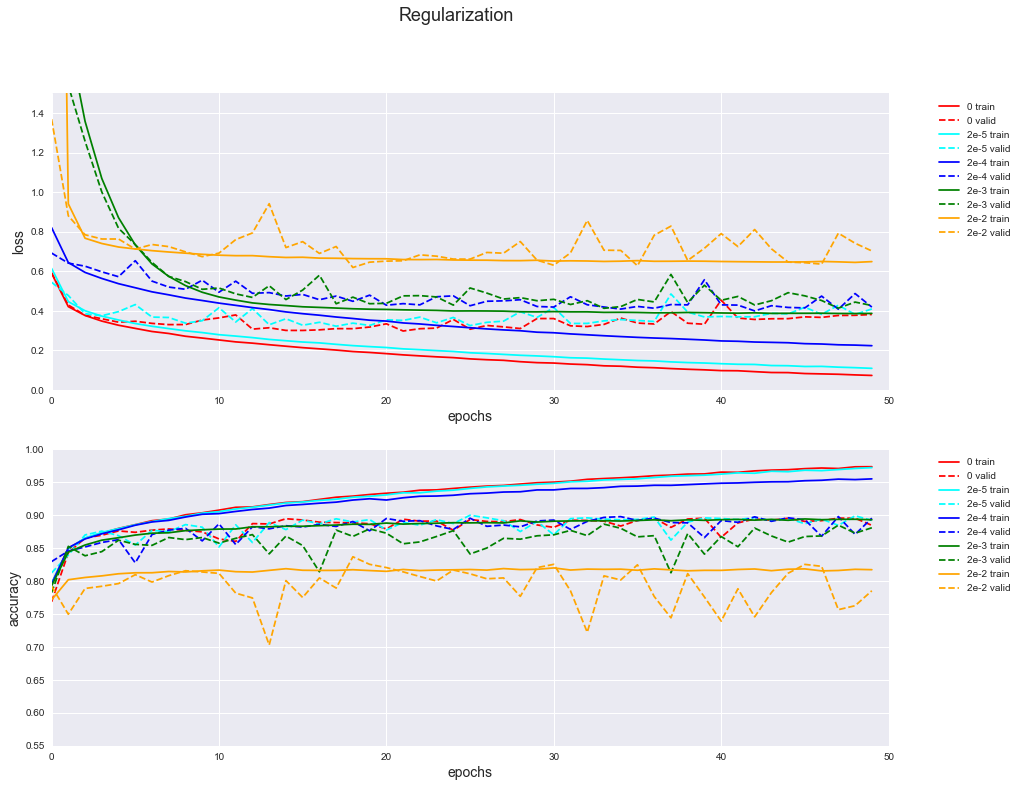

In [255]:
epochs = list(range(50))
plt.figure(figsize=(15,12))
plt.suptitle("Regularization",fontsize=18)
plt.subplot(2,1,1)
plt.plot(epochs,reg_histories[0].history["loss"],color="red",label="0 train")
plt.plot(epochs,reg_histories[0].history["val_loss"],color="red",label="0 valid",linestyle="dashed")
plt.plot(epochs,reg_histories[1].history["loss"],color="cyan",label="2e-5 train")
plt.plot(epochs,reg_histories[1].history["val_loss"],color="cyan",label="2e-5 valid",linestyle="dashed")
plt.plot(epochs,reg_histories[2].history["loss"],color="blue",label="2e-4 train")
plt.plot(epochs,reg_histories[2].history["val_loss"],color="blue",label="2e-4 valid",linestyle="dashed")
plt.plot(epochs,reg_histories[3].history["loss"],color="green",label="2e-3 train")
plt.plot(epochs,reg_histories[3].history["val_loss"],color="green",label="2e-3 valid",linestyle="dashed")
plt.plot(epochs,reg_histories[4].history["loss"],color="orange",label="2e-2 train")
plt.plot(epochs,reg_histories[4].history["val_loss"],color="orange",label="2e-2 valid",linestyle="dashed")
plt.xlabel("epochs",fontsize=14)
plt.ylabel("loss",fontsize=14)
plt.axis([0,50,0,1.5])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.subplot(2,1,2)
plt.plot(epochs,reg_histories[0].history["accuracy"],color="red",label="0 train")
plt.plot(epochs,reg_histories[0].history["val_accuracy"],color="red",label="0 valid",linestyle="dashed")
plt.plot(epochs,reg_histories[1].history["accuracy"],color="cyan",label="2e-5 train")
plt.plot(epochs,reg_histories[1].history["val_accuracy"],color="cyan",label="2e-5 valid",linestyle="dashed")
plt.plot(epochs,reg_histories[2].history["accuracy"],color="blue",label="2e-4 train")
plt.plot(epochs,reg_histories[2].history["val_accuracy"],color="blue",label="2e-4 valid",linestyle="dashed")
plt.plot(epochs,reg_histories[3].history["accuracy"],color="green",label="2e-3 train")
plt.plot(epochs,reg_histories[3].history["val_accuracy"],color="green",label="2e-3 valid",linestyle="dashed")
plt.plot(epochs,reg_histories[4].history["accuracy"],color="orange",label="2e-2 train")
plt.plot(epochs,reg_histories[4].history["val_accuracy"],color="orange",label="2e-2 valid",linestyle="dashed")
plt.xlabel("epochs",fontsize=14)
plt.ylabel("accuracy",fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.axis([0,50,0.55,1])
plt.show()

In [ ]:
## we can see that when the regularization factor is 0 or too low (2e-5) the model tends to overfit the data 
## when it's too large on the other side (2e-2) we're in a high bias situation, the validation accuracy drops
## the best configuration is when it is 2e-4, light overfit still occurs after some epochs but
##    not as much as before, and the validation accuracy is still close to what was previously seen (0.88/0.89)
## we'll be setting the regularization factor to 2e-4 for future models

## also we can limit the training of our model to 30 epochs as clearly going further only results in overfitting
##   without any improvement in validation accuracy and validation loss

In [9]:
## dropout
from tensorflow.keras.layers import Dropout

In [225]:
rates = [0,0.2,0.3,0.75]
drop_histories = []

for rate in rates:
    model = keras.models.Sequential([keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="relu",input_shape=X_train.shape[1:]),
                                     Dropout(rate),
                                     keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="relu"),
                                     Dropout(rate),
                                     keras.layers.Dense(10,activation="softmax")])
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.03),
              metrics=["accuracy"])
    history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),verbose=0)
    drop_histories.append(history)

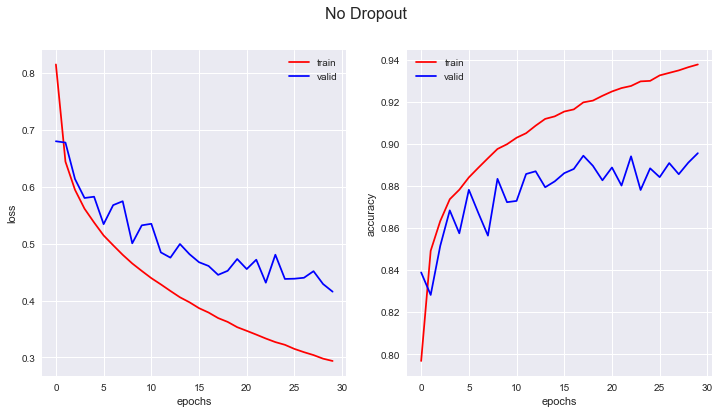

In [251]:
epochs = list(range(30))
plt.figure(figsize=(12,6))
plt.suptitle("No Dropout",fontsize=16)
plt.subplot(1,2,1)
plt.plot(epochs,drop_histories[0].history["loss"],color="red",label="train")
plt.plot(epochs,drop_histories[0].history["val_loss"],color="blue",label="valid")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,drop_histories[0].history["accuracy"],color="red",label="train")
plt.plot(epochs,drop_histories[0].history["val_accuracy"],color="blue",label="valid")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

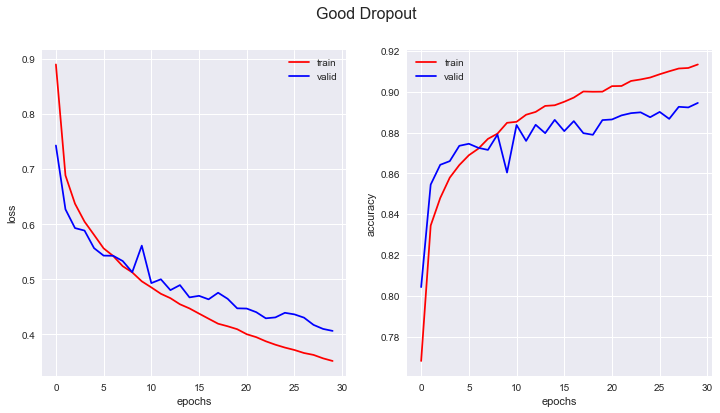

In [252]:
plt.figure(figsize=(12,6))
plt.suptitle("Good Dropout",fontsize=16)
plt.subplot(1,2,1)
plt.plot(epochs,drop_histories[2].history["loss"],color="red",label="train")
plt.plot(epochs,drop_histories[2].history["val_loss"],color="blue",label="valid")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,drop_histories[2].history["accuracy"],color="red",label="train")
plt.plot(epochs,drop_histories[2].history["val_accuracy"],color="blue",label="valid")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

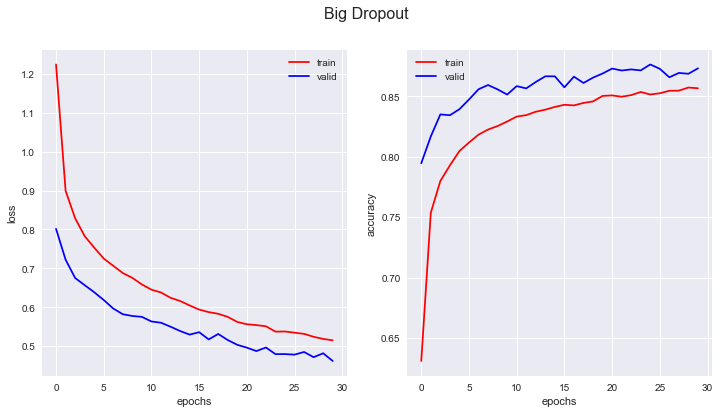

In [253]:
plt.figure(figsize=(12,6))
plt.suptitle("Big Dropout",fontsize=16)
plt.subplot(1,2,1)
plt.plot(epochs,drop_histories[3].history["loss"],color="red",label="train")
plt.plot(epochs,drop_histories[3].history["val_loss"],color="blue",label="valid")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,drop_histories[3].history["accuracy"],color="red",label="train")
plt.plot(epochs,drop_histories[3].history["val_accuracy"],color="blue",label="valid")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [216]:
## An appropriate level of dropout seems to help the model with overfitting without reducing accuracy
## When there's no dropout the model is still clearly overfitting
## Too much dropout  (0.75) on the other side causes a reduction of the model's performance
## We'll select a dropout of 0.3 for our model

In [41]:
## activation function

# finally we're going to see if there's a difference training the neural network with a sigmoid function instead of relu

In [42]:
sig_model = keras.models.Sequential([keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="sigmoid",input_shape=X_train.shape[1:]),
                                     Dropout(0.3),
                                     keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="sigmoid"),
                                     Dropout(0.3),
                                     keras.layers.Dense(10,activation="softmax")])
sig_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.03),
              metrics=["accuracy"])
sig_history = sig_model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),verbose=0)

In [43]:
relu_model = keras.models.Sequential([keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="relu",input_shape=X_train.shape[1:]),
                                     Dropout(0.3),
                                     keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="relu"),
                                     Dropout(0.3),
                                     keras.layers.Dense(10,activation="softmax")])
relu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.03),
              metrics=["accuracy"])
relu_history = relu_model.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),verbose=0)

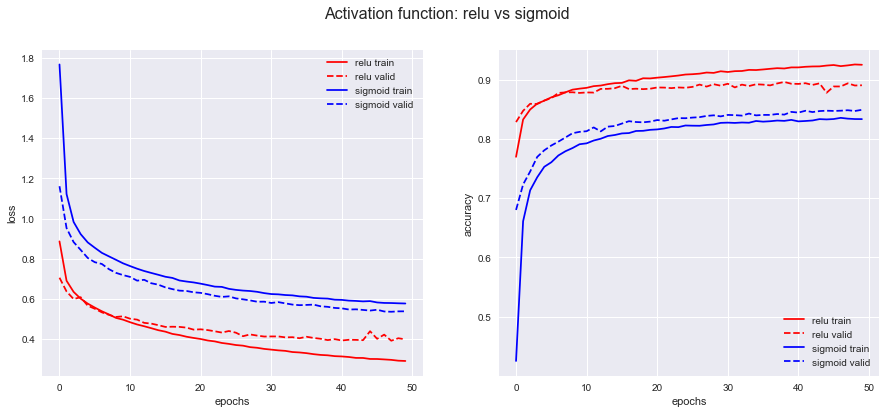

In [44]:
epochs = list(range(50))
plt.figure(figsize=(15,6))
plt.suptitle("Activation function: relu vs sigmoid",fontsize=16)
plt.subplot(1,2,1)
plt.plot(epochs,relu_history.history["loss"],color="red",label="relu train")
plt.plot(epochs,relu_history.history["val_loss"],color="red",label="relu valid",linestyle="dashed")
plt.plot(epochs,sig_history.history["loss"],color="blue",label="sigmoid train")
plt.plot(epochs,sig_history.history["val_loss"],color="blue",label="sigmoid valid",linestyle="dashed")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,relu_history.history["accuracy"],color="red",label="relu train")
plt.plot(epochs,relu_history.history["val_accuracy"],color="red",label="relu valid",linestyle="dashed")
plt.plot(epochs,sig_history.history["accuracy"],color="blue",label="sigmoid train")
plt.plot(epochs,sig_history.history["val_accuracy"],color="blue",label="sigmoid valid",linestyle="dashed")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [45]:
## between the two it's clear that the relu gets better results and converges faster

In [46]:
# comparison with previous model

In [161]:
model = keras.models.Sequential([keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="relu",input_shape=X_train.shape[1:]),
                                     Dropout(0.3),
                                     keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="relu"),
                                     Dropout(0.3),
                                     keras.layers.Dense(10,activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.03),
              metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),verbose=0)

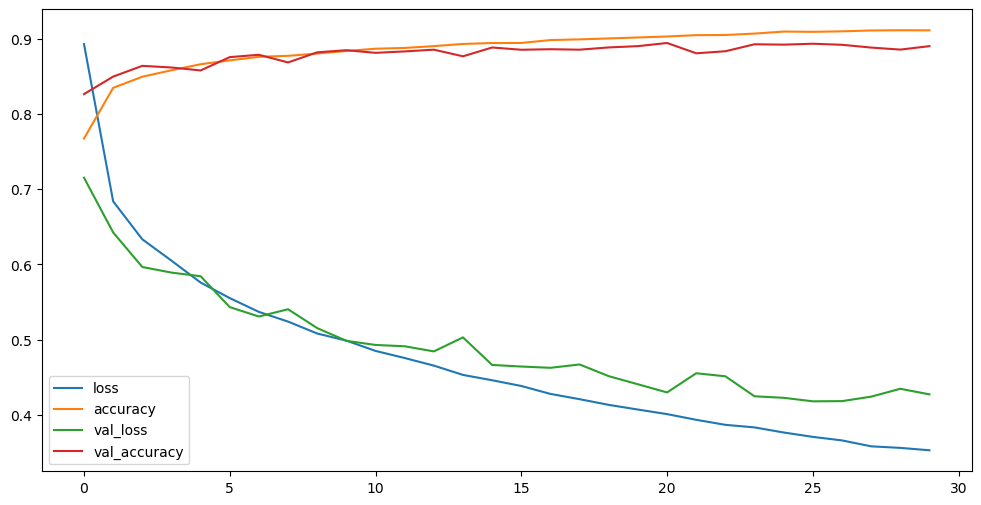

In [162]:
pd.DataFrame(history.history).plot(figsize=(12,6))

In [163]:
model.evaluate(X_valid,y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.4271 - accuracy: 0.8902


[0.427090048789978, 0.8902000188827515]

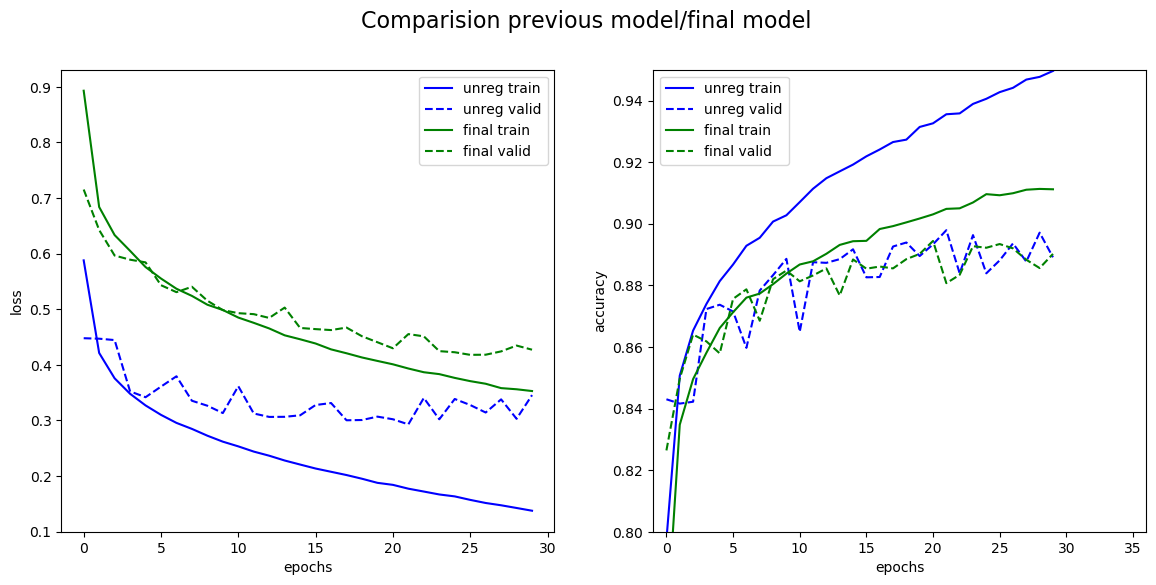

In [164]:
epochs = list(range(30))
plt.figure(figsize=(14,6))
plt.suptitle("Comparision previous model/final model",fontsize=16)
plt.subplot(1,2,1)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,unreg_history.history["loss"][:30],label="unreg train",color="blue")
plt.plot(epochs,unreg_history.history["val_loss"][:30],label="unreg valid",color="blue",linestyle="dashed")
plt.plot(epochs,history.history["loss"],label="final train",color="green")
plt.plot(epochs,history.history["val_loss"],label="final valid",color="green",linestyle="dashed")
plt.legend()
plt.subplot(1,2,2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(epochs,unreg_history.history["accuracy"][:30],label="unreg train",color="blue")
plt.plot(epochs,unreg_history.history["val_accuracy"][:30],label="unreg valid",color="blue",linestyle="dashed")
plt.plot(epochs,history.history["accuracy"],label="final train",color="green")
plt.plot(epochs,history.history["val_accuracy"],label="final valid",color="green",linestyle="dashed")
plt.axis([-1,36,0.8,0.95])
plt.legend()
plt.show()

In [245]:
# while the model is still slightly overfitting, adding regularization and dropout reduced it for sure

In [27]:
#######################################
## error analysis
#######################################

In [165]:
y_pred = model.predict_classes(X_valid)

In [166]:
conf_mx = confusion_matrix(y_valid,y_pred)

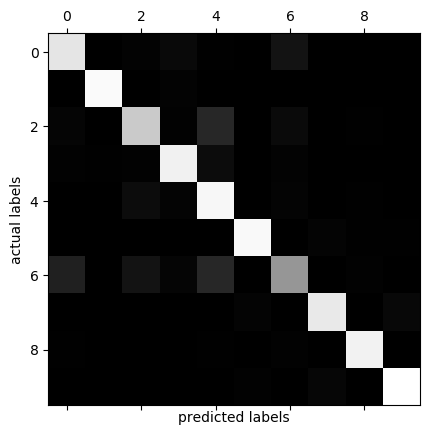

In [170]:
plt.style.use('default')
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.xlabel("predicted labels")
plt.ylabel("actual labels")
plt.show()

In [168]:
## Obviously since the model is doing a pretty good job with the prediction all we see here is the diagonal
##    corresponding to the right guesses. 
## We'll fill the diagonal with zeros and normalize every row to the number of istances for that label

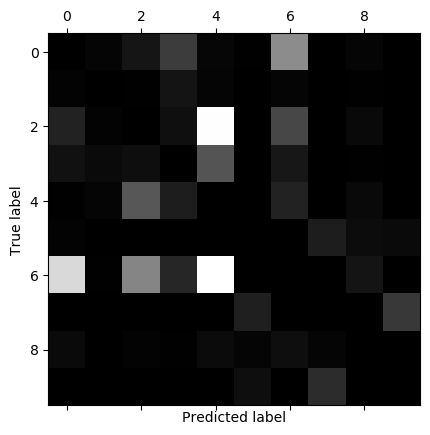

In [171]:
row_sums = conf_mx.sum(axis=1)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [172]:
print(f"The model is having problems classifying correctly the class {y_labels[6]}")
print(f"In particular it often confuses it with the classes {y_labels[0]}, {y_labels[2]} and {y_labels[4]}")
print(f"Classes {y_labels[2]} and {y_labels[4]} are also frequently confused with one another")

The model is having problems classifying correctly the class Shirt
In particular it often confuses it with the classes T-shirt/top, Pullover and Coat
Classes Pullover and Coat are also frequently confused with one another


In [173]:
## we can clearly see that the model is struggling in the classification of shirts also by looking at precision and recall
##   for every class avaiable. In the case of shirts both precision and recall are much lower than for the other classes:

In [174]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1023
           1       0.98      0.98      0.98       988
           2       0.84      0.78      0.81      1008
           3       0.91      0.91      0.91      1021
           4       0.72      0.91      0.81      1050
           5       0.97      0.97      0.97       996
           6       0.79      0.60      0.68       970
           7       0.95      0.95      0.95       955
           8       0.97      0.97      0.97       968
           9       0.96      0.97      0.97      1021

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [175]:
# Let's take a look at some of these errors, compared to istances of shirts that have been correctly classified

In [176]:
shirt_class = 6
X_correct = X_valid[(y_valid == shirt_class) & (y_pred == shirt_class)]
X_incorrect = X_valid[(y_valid == shirt_class) & (y_pred != shirt_class)]

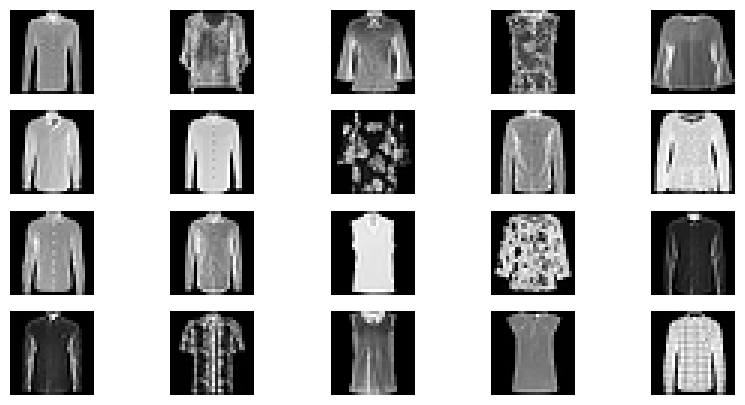

In [177]:
#correctly classified 

plt.figure(figsize=(10, 5))
for idx in range(20):
    plt.subplot(4, 5, idx + 1)
    img = X_correct[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

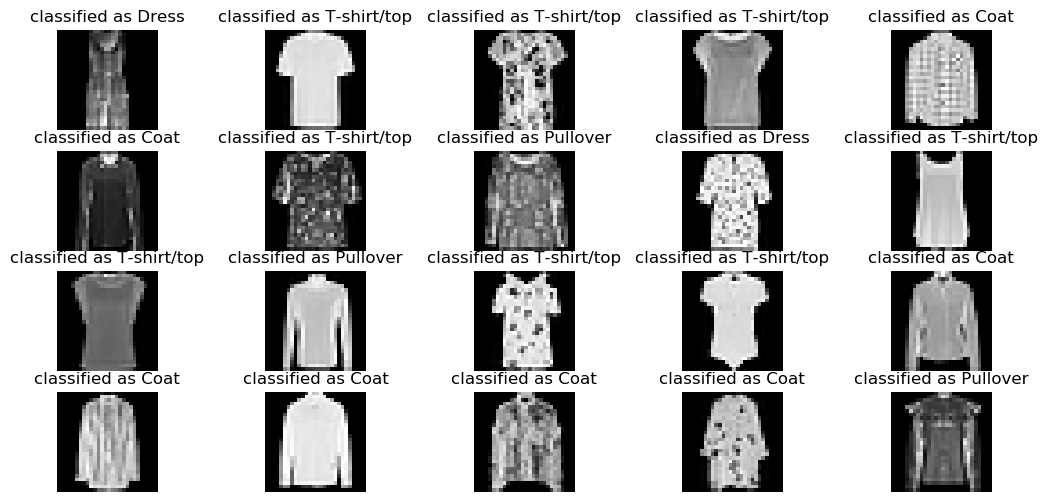

In [178]:
# incorrectly classified

plt.figure(figsize=(13, 6))
for idx in range(20):
    plt.subplot(4, 5, idx + 1)
    plt.title(f"classified as {y_labels[int(model.predict_classes(X_incorrect[idx].reshape(-1,784)))]}")
    img = X_incorrect[idx].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [139]:
# for some examples it's easy to see how the model missclassify these products, as they look alike to other classes
# most likely a human classifier would missclassify some of them aswell....

In [179]:
## Let's take a look about how sure is the model about these classification

In [180]:
model.predict(X_incorrect).round(2)[:10]

array([[0.01, 0.04, 0.  , 0.95, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.95, 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.9 , 0.  , 0.  , 0.03, 0.  , 0.  , 0.06, 0.  , 0.  , 0.  ],
       [0.66, 0.  , 0.  , 0.  , 0.  , 0.  , 0.34, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.03, 0.  , 0.83, 0.  , 0.15, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.  , 0.89, 0.  , 0.09, 0.  , 0.  , 0.  ],
       [0.53, 0.  , 0.02, 0.01, 0.  , 0.  , 0.44, 0.  , 0.  , 0.  ],
       [0.03, 0.  , 0.4 , 0.01, 0.22, 0.  , 0.32, 0.  , 0.01, 0.  ],
       [0.36, 0.  , 0.03, 0.52, 0.01, 0.  , 0.09, 0.  , 0.  , 0.  ],
       [0.64, 0.  , 0.  , 0.01, 0.  , 0.  , 0.35, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [181]:
## we can see that in some cases the model isn't sure at all about the classification

In [182]:
## Since it looks like most of the errors of the model are due to the fact that it doesn't recognise appropriatly 
##    shirts from t-shirts/coats and pullovers, an idea could be to feed to the model more labeled examples to help it
##    gradually learn what's the difference

In [206]:
## FINAL MODEL

In [194]:
## since we don't need to tweak hyperparameters anymore we can train the model chosen on all the labeled data available

In [11]:
X_final = np.concatenate([X_train,X_valid])

In [12]:
X_final.shape

(60000, 784)

In [13]:
y_final = np.concatenate([y_train,y_valid])

In [14]:
y_final.shape

(60000,)

In [15]:
final_model =  keras.models.Sequential([keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="relu",input_shape=X_train.shape[1:]),
                                     Dropout(0.3),
                                     keras.layers.Dense(512,kernel_regularizer=l2(2e-4),activation="relu"),
                                     Dropout(0.3),
                                     keras.layers.Dense(10,activation="softmax")])
final_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.03),
              metrics=["accuracy"])
final_history = final_model.fit(X_final,y_final,epochs=30,verbose=0)

In [ ]:
## submit for evaluation

In [18]:
##################################################
# Save your test prediction in y_test_pred
##################################################

y_test_pred = final_model.predict_classes(X_test)

# Create submission
submission = pd.read_csv(os.path.join(file_path, 'sample_submission.csv'))
if y_test_pred is not None:
    submission['class'] = y_test_pred
submission.to_csv('my_submission.csv', index=False)